# 1. Datapreprocessing

In this part I do the following tasks.
1. Load the data from mongo DB
2. Convert to pandas dataframe
3. Check for missing values
4. Remove duplicates
5. Describe Dataset and look for outliers
6. Final view on cleaned dataset

## 1.1 Load the data from mongo db

In [322]:
import json
from pymongo import MongoClient
import pymongo
import random
import pandas as pd

client = MongoClient('localhost', 27017)

# let's get the list of DBs already defined
print(client.list_database_names())

['admin', 'bda', 'config', 'local']


In [323]:
# first get the collection where we stored the posts
posts = client["bda"]["posts"]

In [324]:
# look at length
client['bda']['posts'].count_documents({})

202518

In [325]:
# look at the first data row
posts.find_one()


{'_id': ObjectId('658b057ab5aa05caea7c43b0'),
 'caption': 'Seorang gadis terjebak di bawah reruntuhan rumah yang hancur di Jalur Gaza. Melalui m.z.gaza\n\n #freepalestine #freepalestine🇵🇸❤️ #palestine #fyp #gaza #gazatonight #islam #kemanusiaan #pbb #peace #stopwar #joebiden #putin #kingsalman #world #stopthewar #stopgenocide #stopgenocideingaza #unicef #indonesia #savechild #savechildrenpalestine #russia #turkey #urope #humanity #lfl #dubai #america',
 'like_count': 0,
 'permalink': 'https://www.instagram.com/reel/C1UorsTvhDd/',
 'timestamp': '2023-12-26T16:10:40+0000',
 'media_type': 'VIDEO',
 'comments_count': 0,
 'media_url': 'https://scontent-fra5-1.cdninstagram.com/o1/v/t16/f1/m82/E649213474C7BEF1B3F451571D498FB5_video_dashinit.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLmNsaXBzLnVua25vd24tQzMuNzIwLmRhc2hfYmFzZWxpbmVfMV92MSJ9&_nc_ht=scontent-fra5-1.cdninstagram.com&_nc_cat=106&vs=892790979215296_405417794&_nc_vs=HBksFQIYT2lnX3hwdl9yZWVsc19wZXJtYW5lbnRfcHJvZC9FNjQ5MjEzNDc0Qzd

On the first day 25.12 I gethared data only for the freepalistina hashtag, because I were adpating the data collection process and it has some problems. Also After the 25.12 I have gathered for posts besides this attribues also the comment_counts and and media_url.

I think now we have to options either we delete the data before the 26.12
Or where it is nescessary in the analysis part we consider not he 25.12

I will choose the first option, because I think from the data of the 25.12 we can see also intersting things.

In [339]:
# all documents have an id

print(f"mising id: {posts.count_documents({'id':None})}")
print(f"mising caption: {posts.count_documents({'caption':None})}")
print(f"timestamp: {posts.count_documents({'timestamp':None})}")
print(f"permalink: {posts.count_documents({'permalink':None})}")
print(f"media_type: {posts.count_documents({'media_type':None})}")
print(f"permalink: {posts.count_documents({'timestamp':None})}")
print(f"comments_count: {posts.count_documents({'comments_count':None})}")
print(f"like_count: {posts.count_documents({'like_count':None})}")
print(f"media_url: {posts.count_documents({'media_url':None})}")


mising id: 0
mising caption: 479
timestamp: 0
permalink: 0
media_type: 0
permalink: 0
comments_count: 0
like_count: 12548
media_url: 42312


In [327]:
# we have only missing values for the caption, maybe because on the post was no caption given
res = posts.find({'caption':None}).limit(5)

In [328]:
for x in res:
    print(x)

{'_id': ObjectId('658b057ab5aa05caea7c442c'), 'like_count': 0, 'permalink': 'https://www.instagram.com/p/C1Uny-tt9Zg/', 'timestamp': '2023-12-26T16:01:55+0000', 'media_type': 'IMAGE', 'comments_count': 1, 'media_url': 'https://scontent-fra3-1.cdninstagram.com/v/t51.29350-15/413411290_1549984449135550_3746586333223642152_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=c4dd86&_nc_ohc=99q2auIFE1YAX-5Tuxe&_nc_ht=scontent-fra3-1.cdninstagram.com&edm=AEoDcc0EAAAA&oh=00_AfCtv3d5-2pk5Sy03C5dWTbmX6mTfKm10Znkap-E7so4Tg&oe=658FEA04', 'id': '18012334579924947'}
{'_id': ObjectId('658b057ab5aa05caea7c44b7'), 'like_count': 14, 'permalink': 'https://www.instagram.com/p/C1UnDGLosfF/', 'timestamp': '2023-12-26T15:55:23+0000', 'media_type': 'IMAGE', 'comments_count': 2, 'media_url': 'https://scontent-fra5-1.cdninstagram.com/v/t51.29350-15/412561241_1034231524514270_696652521627520476_n.heic?stp=dst-jpg&_nc_cat=100&ccb=1-7&_nc_sid=c4dd86&_nc_ohc=JAH5QzuY4AUAX_oMGj3&_nc_oc=AQnNuAcOAFd5Inqd06TJLw72Zznra21nz0OWP2dR3mtTDH8

So we see that the field cpation is missing in those. This is really suspicious because we should get only posts where hashtags are. When into for example the first one listed and click on it's permalink https://www.instagram.com/p/C1Uny-tt9Zg/ . I  can see that it has really no caption. I think this is because of an error in the instagram graph api. Anyway because my analysis is hastag based I will remove samples with missing captions. The like count and media url is not important for us, so we will keep samples with null values there. Nevertheless let's take also a look for missing media url and like count.

In [340]:
# first look at the missing values for media url
res = posts.find({'media_url':None}).limit(5)

In [341]:
for x in res:
    print(x)

{'_id': ObjectId('658b057ab5aa05caea7c43b5'), 'caption': 'Day 81\n\nStrawberry  fields forever.\n\n#warstories\n#israel\n#gaza \n#childrenofwar', 'like_count': 0, 'permalink': 'https://www.instagram.com/reel/C1UonAftrX5/', 'timestamp': '2023-12-26T16:10:22+0000', 'media_type': 'VIDEO', 'comments_count': 0, 'id': '18251065054209917'}
{'_id': ObjectId('658b057ab5aa05caea7c43be'), 'caption': 'Palestinian families displaced from areas in the sector fleeing Israeli bombings, the land and streets have been flooded due to lack of space in schools and shelter centers in Gaza. \n #CeasefireNOW \n-\nPost by rabie_noqaira \n-\n#FreePalestine #palestinian #gaza #jerusalem #تصويري #photographer  #palestine #alaqsa #Occupation #Blockade \n#SaveSheikhJarrah #SavePalestine #GazaUnderAttack #gazastrip  #muslim #indonesia #pakistan #qatar  #Malaysia  #filistin #team_palestina #endisraeliapartheid #holdisraelaccountable \u202c\u2069 \u2067\u202b#غزة_الآن\u202c\u2069 \u2067\u202b#غزة\u202c\u2069 \u2067\u2

In [342]:
# look at the missing values for like count
res = posts.find({'like_count':None}).limit(5)
for x in res:
    print(x)


{'_id': ObjectId('658b057ab5aa05caea7c43b6'), 'caption': 'Only Palestinians have this level of \nIMAN🇵🇸🥹\n#freepalestine🇵🇸 #gaza #fromrivertotheseapalestinewillbefree \n#islamicreminder #muslimreels #islamicquotes #freegaza', 'permalink': 'https://www.instagram.com/reel/C1UoUtyqFV3/', 'timestamp': '2023-12-26T16:10:13+0000', 'media_type': 'VIDEO', 'comments_count': 0, 'media_url': 'https://scontent-fra5-1.cdninstagram.com/o1/v/t16/f1/m82/C445D2181357843BBCA27BE978BC2CB7_video_dashinit.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLmNsaXBzLnVua25vd24tQzMuNzIwLmRhc2hfYmFzZWxpbmVfMV92MSJ9&_nc_ht=scontent-fra5-1.cdninstagram.com&_nc_cat=105&vs=3597726477168453_3551557883&_nc_vs=HBksFQIYT2lnX3hwdl9yZWVsc19wZXJtYW5lbnRfcHJvZC9DNDQ1RDIxODEzNTc4NDNCQkNBMjdCRTk3OEJDMkNCN192aWRlb19kYXNoaW5pdC5tcDQVAALIAQAVAhg6cGFzc3Rocm91Z2hfZXZlcnN0b3JlL0dQdzFzQmlsSE8zV1lhY0dBTVpfS3gzOTAtNHBicV9FQUFBRhUCAsgBACgAGAAbAYgHdXNlX29pbAExFQAAJrjIxKGNvfc%2FFQIoAkMzLBdAKDItDlYEGRgSZGFzaF9iYXNlbGluZV8xX3YxEQB1AAA%3D&cc

In [343]:
# does null values for like count mean the like count is null? We see that is not meant with null values, it means there is no like count field in the document
res = posts.find({'like_count':0}).limit(5)
for x in res:
    print(x)

{'_id': ObjectId('658b057ab5aa05caea7c43b0'), 'caption': 'Seorang gadis terjebak di bawah reruntuhan rumah yang hancur di Jalur Gaza. Melalui m.z.gaza\n\n #freepalestine #freepalestine🇵🇸❤️ #palestine #fyp #gaza #gazatonight #islam #kemanusiaan #pbb #peace #stopwar #joebiden #putin #kingsalman #world #stopthewar #stopgenocide #stopgenocideingaza #unicef #indonesia #savechild #savechildrenpalestine #russia #turkey #urope #humanity #lfl #dubai #america', 'like_count': 0, 'permalink': 'https://www.instagram.com/reel/C1UorsTvhDd/', 'timestamp': '2023-12-26T16:10:40+0000', 'media_type': 'VIDEO', 'comments_count': 0, 'media_url': 'https://scontent-fra5-1.cdninstagram.com/o1/v/t16/f1/m82/E649213474C7BEF1B3F451571D498FB5_video_dashinit.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLmNsaXBzLnVua25vd24tQzMuNzIwLmRhc2hfYmFzZWxpbmVfMV92MSJ9&_nc_ht=scontent-fra5-1.cdninstagram.com&_nc_cat=106&vs=892790979215296_405417794&_nc_vs=HBksFQIYT2lnX3hwdl9yZWVsc19wZXJtYW5lbnRfcHJvZC9FNjQ5MjEzNDc0QzdCRUYxQj

## 1.2 Load data into pandas dataframe

Now we want to look for the distribution of the data especially for the caption and the timestamp would it be nice to now, to see their average length. We have two option we query with mongo for agrigations or we load the dataf into a pandas dataframe and operate from there. I think the second is option is for plotting results faster then using the queries for mongo db. Also we will delete in the pandas dataframe the misisng values for caption.

In [344]:
# now we want to describe the data set
res = posts.find()

print(res)
list_of_posts = []
for x in res:
    list_of_posts.append(x)


In [345]:
print(len(list_of_posts))

204551


In [346]:
df_posts = pd.DataFrame(list_of_posts)
df_posts.head()

,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id
0,658b057ab5aa05caea7c43b0,Seorang gadis terjebak di bawah reruntuhan rum...,0.0,https://www.instagram.com/reel/C1UorsTvhDd/,2023-12-26T16:10:40+0000,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,17850539124106077
1,658b057ab5aa05caea7c43b1,O man! Prepare yourself.\n.\n.\n.\n.\n.\n#isla...,0.0,https://www.instagram.com/reel/C1UofHYCRtA/,2023-12-26T16:10:38+0000,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18010025203971722
2,658b057ab5aa05caea7c43b2,#Gaza #freepalestine,0.0,https://www.instagram.com/reel/C1Uohz_pG9x/,2023-12-26T16:10:38+0000,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,17872054467021415
3,658b057ab5aa05caea7c43b3,𝐍𝐚𝐬𝐞𝐞𝐛 𝐖𝐚𝐥𝐞 𝐋𝐨𝐠 𝐀𝐥𝐥𝐚𝐡 𝐋𝐢𝐤𝐡𝐞 🥰🥰🥰\n:\n:\n:\nIG: ...,1.0,https://www.instagram.com/reel/C1UoqcyS6Ir/,2023-12-26T16:10:28+0000,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18087592984397658
4,658b057ab5aa05caea7c43b4,#israelilies #zionismisterrorism #zionismisnot...,0.0,https://www.instagram.com/reel/C1UosF2C-Vp/,2023-12-26T16:10:27+0000,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18111219736316835


In [347]:
# look at the data types
df_posts.dtypes

_id                object
caption            object
like_count        float64
permalink          object
timestamp          object
media_type         object
comments_count      int64
media_url          object
id                 object
dtype: object

In [348]:
# todo change this datatypes

posts_datatypes = {
  'caption': 'string',
  'media_type' : 'category',
  '_id': 'string',
  'timestamp': 'datetime64[ns, UTC]',
  'id': 'int64'
  }

df_posts = df_posts.astype(posts_datatypes)
df_posts.dtypes

_id                    string[python]
caption                string[python]
like_count                    float64
permalink                      object
timestamp         datetime64[ns, UTC]
media_type                   category
comments_count                  int64
media_url                      object
id                              int64
dtype: object

## 1.3 Check for missing values

In [349]:
# look after representation of missing values, we now from the previous queries that for this _id there not exits any caption 658b057ab5aa05caea7c442c
df_posts[df_posts["_id"] == "658b057ab5aa05caea7c442c" ]


,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id
124,658b057ab5aa05caea7c442c,<NA>,0.0,https://www.instagram.com/p/C1Uny-tt9Zg/,2023-12-26 16:01:55+00:00,IMAGE,1,https://scontent-fra3-1.cdninstagram.com/v/t51...,18012334579924947


In [350]:
df_posts[df_posts["caption"].isnull()]

,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id
124,658b057ab5aa05caea7c442c,<NA>,0.0,https://www.instagram.com/p/C1Uny-tt9Zg/,2023-12-26 16:01:55+00:00,IMAGE,1,https://scontent-fra3-1.cdninstagram.com/v/t51...,18012334579924947
263,658b057ab5aa05caea7c44b7,<NA>,14.0,https://www.instagram.com/p/C1UnDGLosfF/,2023-12-26 15:55:23+00:00,IMAGE,2,https://scontent-fra5-1.cdninstagram.com/v/t51...,17989463990315834
599,658b057ab5aa05caea7c4607,<NA>,33.0,https://www.instagram.com/reel/C1UL5v4Imlu/,2023-12-26 12:45:49+00:00,VIDEO,7,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18021963223758322
1098,658b057ab5aa05caea7c47fa,<NA>,112.0,https://www.instagram.com/reel/C1UfbbGNqH_/,2023-12-26 14:49:07+00:00,VIDEO,2,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18009477158146604
1099,658b057ab5aa05caea7c47fb,<NA>,20.0,https://www.instagram.com/reel/C1UfTBIPwYj/,2023-12-26 14:48:11+00:00,VIDEO,3,https://scontent-fra5-1.cdninstagram.com/o1/v/...,17985982739548378
...,...,...,...,...,...,...,...,...,...
201428,658dfa1bb1bead4d95670396,<NA>,1.0,https://www.instagram.com/reel/C1YLOgdRbVO/,2023-12-28 01:11:24+00:00,VIDEO,1,https://scontent-bcn1-1.cdninstagram.com/o1/v/...,17882037179992994
201438,658dfa1bb1bead4d956703a0,<NA>,16.0,https://www.instagram.com/p/C1YKa2OC2vw/,2023-12-28 01:02:11+00:00,CAROUSEL_ALBUM,4,NaN,18093380365391768
201752,658dfa1bb1bead4d956704da,<NA>,1.0,https://www.instagram.com/reel/C1YFT1kxe2q/,2023-12-28 00:18:29+00:00,VIDEO,1,https://scontent-bcn1-1.cdninstagram.com/o1/v/...,18413395030010732
203269,658e91d0b1bead4d95670ac7,<NA>,0.0,https://www.instagram.com/p/C1Z_HzmNYD1/,2023-12-28 18:01:56+00:00,IMAGE,1,https://scontent-bcn1-1.cdninstagram.com/v/t51...,17981895188433828


In [351]:
# count missing values for every column, they are the counts are the same as with mongo db
df_posts.isnull().sum()

_id                   0
caption             479
like_count        12548
permalink             0
timestamp             0
media_type            0
comments_count        0
media_url         42312
id                    0
dtype: int64

In [352]:
df_posts[df_posts["caption"].notnull()].head()

,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id
0,658b057ab5aa05caea7c43b0,Seorang gadis terjebak di bawah reruntuhan rum...,0.0,https://www.instagram.com/reel/C1UorsTvhDd/,2023-12-26 16:10:40+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,17850539124106077
1,658b057ab5aa05caea7c43b1,O man! Prepare yourself. . . . . . #islamicquo...,0.0,https://www.instagram.com/reel/C1UofHYCRtA/,2023-12-26 16:10:38+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18010025203971722
2,658b057ab5aa05caea7c43b2,#Gaza #freepalestine,0.0,https://www.instagram.com/reel/C1Uohz_pG9x/,2023-12-26 16:10:38+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,17872054467021415
3,658b057ab5aa05caea7c43b3,𝐍𝐚𝐬𝐞𝐞𝐛 𝐖𝐚𝐥𝐞 𝐋𝐨𝐠 𝐀𝐥𝐥𝐚𝐡 𝐋𝐢𝐤𝐡𝐞 🥰🥰🥰 : : : IG: khaw...,1.0,https://www.instagram.com/reel/C1UoqcyS6Ir/,2023-12-26 16:10:28+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18087592984397658
4,658b057ab5aa05caea7c43b4,#israelilies #zionismisterrorism #zionismisnot...,0.0,https://www.instagram.com/reel/C1UosF2C-Vp/,2023-12-26 16:10:27+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18111219736316835


In [353]:
# that are exactly the amount of captions that are not null
len(df_posts[df_posts["caption"].notnull()])

204072

In [354]:
# filter out missing values for caption
df_posts = df_posts[df_posts["caption"].notnull()]
len(df_posts)


204072

In [355]:
# no more missing values for the caption
df_posts.isnull().sum()

_id                   0
caption               0
like_count        12521
permalink             0
timestamp             0
media_type            0
comments_count        0
media_url         42241
id                    0
dtype: int64

In [356]:
# always look at the data

df_posts.head()

,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id
0,658b057ab5aa05caea7c43b0,Seorang gadis terjebak di bawah reruntuhan rum...,0.0,https://www.instagram.com/reel/C1UorsTvhDd/,2023-12-26 16:10:40+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,17850539124106077
1,658b057ab5aa05caea7c43b1,O man! Prepare yourself. . . . . . #islamicquo...,0.0,https://www.instagram.com/reel/C1UofHYCRtA/,2023-12-26 16:10:38+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18010025203971722
2,658b057ab5aa05caea7c43b2,#Gaza #freepalestine,0.0,https://www.instagram.com/reel/C1Uohz_pG9x/,2023-12-26 16:10:38+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,17872054467021415
3,658b057ab5aa05caea7c43b3,𝐍𝐚𝐬𝐞𝐞𝐛 𝐖𝐚𝐥𝐞 𝐋𝐨𝐠 𝐀𝐥𝐥𝐚𝐡 𝐋𝐢𝐤𝐡𝐞 🥰🥰🥰 : : : IG: khaw...,1.0,https://www.instagram.com/reel/C1UoqcyS6Ir/,2023-12-26 16:10:28+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18087592984397658
4,658b057ab5aa05caea7c43b4,#israelilies #zionismisterrorism #zionismisnot...,0.0,https://www.instagram.com/reel/C1UosF2C-Vp/,2023-12-26 16:10:27+00:00,VIDEO,0,https://scontent-fra5-1.cdninstagram.com/o1/v/...,18111219736316835


In [357]:
# create a new column for the length of the caption
df_posts['caption_length'] = df_posts['caption'].apply(lambda x:len(x))
df_posts[["caption","caption_length"]].head()

,caption,caption_length
0,Seorang gadis terjebak di bawah reruntuhan rum...,393
1,O man! Prepare yourself. . . . . . #islamicquo...,271
2,#Gaza #freepalestine,20
3,𝐍𝐚𝐬𝐞𝐞𝐛 𝐖𝐚𝐥𝐞 𝐋𝐨𝐠 𝐀𝐥𝐥𝐚𝐡 𝐋𝐢𝐤𝐡𝐞 🥰🥰🥰 : : : IG: khaw...,438
4,#israelilies #zionismisterrorism #zionismisnot...,113


## 1.4 Remove duplicates

In [358]:
# let's see how much unique instagram post id's we have
print(f"number of toal documents: {len(df_posts)}")
print(f"Number of unique messages: {len(df_posts['id'].unique())}")
print(f"number of duplicates {len(df_posts)-len(df_posts['id'].unique())}")

number of toal documents: 204072
Number of unique messages: 122881
number of duplicates 81191


In [359]:
# here we see only duplicates and the original message, therefore for example in row 3 and 4 the ids are different
df_posts[df_posts.duplicated(subset=["id"])].sort_values("id",ascending=True).head()


,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id,caption_length
116813,658c911eb5d5fe68a1445600,"MasyaAllah begitulah kemuliaan para Syuhada, s...",2.0,https://www.instagram.com/reel/C1WGGfCPGcV/,2023-12-27 05:52:15+00:00,VIDEO,0,NaN,17842681893137308,519
93068,658c5ffb4856f63df2f8ae57,"MasyaAllah begitulah kemuliaan para Syuhada, s...",2.0,https://www.instagram.com/reel/C1WGGfCPGcV/,2023-12-27 05:52:15+00:00,VIDEO,0,NaN,17842681893137308,519
75488,658c2a074da831979c7c7ccf,Community and Unity is more necessary than eve...,63.0,https://www.instagram.com/p/C1Um1SsMYuc/,2023-12-26 15:53:30+00:00,IMAGE,17,https://scontent-bcn1-1.cdninstagram.com/v/t39...,17843041812137162,797
49800,658bfa93dbc5ecb5c450953f,Gaza map update: The IDF made large advances...,1243.0,https://www.instagram.com/p/C1U65qitkfP/,2023-12-26 18:48:51+00:00,CAROUSEL_ALBUM,148,NaN,17843050773137356,386
36088,658b5a26ce70807798a562e8,Gaza map update: The IDF made large advances...,913.0,https://www.instagram.com/p/C1U65qitkfP/,2023-12-26 18:48:51+00:00,CAROUSEL_ALBUM,102,NaN,17843050773137356,386


In [360]:
# let's look on one message, which has duplicates
df_posts[df_posts["id"] == 17843041812137162]

,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id,caption_length
38637,658b5a26ce70807798a56cdd,Community and Unity is more necessary than eve...,45.0,https://www.instagram.com/p/C1Um1SsMYuc/,2023-12-26 15:53:30+00:00,IMAGE,13,https://scontent-mad1-1.cdninstagram.com/v/t39...,17843041812137162,797
75488,658c2a074da831979c7c7ccf,Community and Unity is more necessary than eve...,63.0,https://www.instagram.com/p/C1Um1SsMYuc/,2023-12-26 15:53:30+00:00,IMAGE,17,https://scontent-bcn1-1.cdninstagram.com/v/t39...,17843041812137162,797


In [361]:
# we take only the latest of the duplicates looking at the timestamp. therefore I first order the posts after the object id, because the first 4 byte of an mongo db object id
# represents the ocjects id creation, measure in seconds from the unix epoch

posts_without_duplicates = df_posts.sort_values("_id",ascending=False).drop_duplicates(subset=["id"],keep="first")
len(posts_without_duplicates)

122881

In [362]:
# the post which is later is keeped only
posts_without_duplicates[posts_without_duplicates["id"] == 17843041812137162]


,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id,caption_length
75488,658c2a074da831979c7c7ccf,Community and Unity is more necessary than eve...,63.0,https://www.instagram.com/p/C1Um1SsMYuc/,2023-12-26 15:53:30+00:00,IMAGE,17,https://scontent-bcn1-1.cdninstagram.com/v/t39...,17843041812137162,797


In [363]:
df_posts = posts_without_duplicates
print(f"number of toal documents: {len(df_posts)}")
print(f"Number of unique messages: {len(df_posts['id'].unique())}")
print(f"number of duplicates {len(df_posts)-len(df_posts['id'].unique())}")

number of toal documents: 122881
Number of unique messages: 122881
number of duplicates 0


## 1.5 Describe Dataset and look for outliers

In [364]:
df_posts.describe()

,like_count,comments_count,id,caption_length
count,114835.000000,122881.000000,1.228810e+05,122881.000000
mean,114.467488,5.469291,1.803413e+16,333.921680
std,1809.055529,65.595000,1.255840e+14,334.640638
min,0.000000,0.000000,1.784268e+16,1.000000
25%,1.000000,0.000000,1.797486e+16,117.000000
50%,4.000000,0.000000,1.801235e+16,258.000000
75%,20.000000,1.000000,1.804938e+16,413.000000
max,364452.000000,7260.000000,1.851245e+16,2200.000000


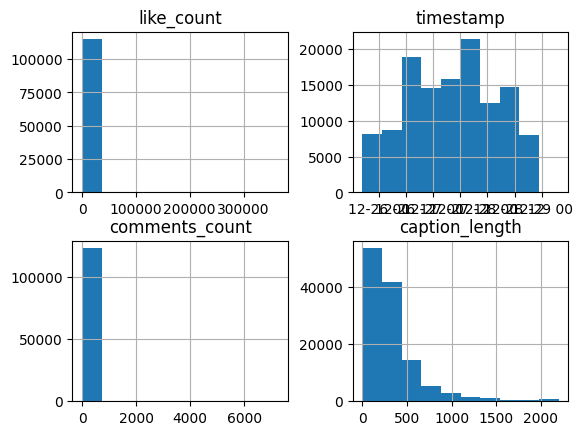

In [365]:
# TODO: maybe show also distribution of media
df_posts[["like_count","timestamp","comments_count","caption_length"]].hist()
pass

We can see also considering the description that the values for the caption length seem realistic especially when considering the maximum length for a caption for instagram posts is 2200 characters, which can be see also as a maximum value for the caption length in our dataset. But what is suspicious that in created description table the minimum caption length is one, but our smallest hashtag #war has at least a length of four

For the like count and comment count,it can be observerd that it 0 for a lost posts, this is because we grab posts published at latest 24 hours before we grab them. Both columns could be not intresting for us because we get the recent posts and we grab tham at different time points. For example one post can be grabbed two minutes after it appeared whereas an nother post is grabed 20 hours after it appeared. Nevertheless we think we can use the like and comment count to plot the values for analysis, because this problem is for all posts and not only for posts of a special hashtag.




In [366]:
df_posts[df_posts["caption_length"] <= 4].head(50)

,_id,caption,like_count,permalink,timestamp,media_type,comments_count,media_url,id,caption_length
199216,658dfa1bb1bead4d9566faf2,🍉,2.0,https://www.instagram.com/p/C1YuwGdPx0j/,2023-12-28 06:19:39+00:00,CAROUSEL_ALBUM,2,NaN,18018546265969766,1
189147,658dfa1bb1bead4d9566d39d,👏👏👏,2.0,https://www.instagram.com/reel/C1aG-eHNnTk/,2023-12-28 19:13:43+00:00,VIDEO,1,https://scontent-bcn1-1.cdninstagram.com/o1/v/...,17854398942071976,3
187914,658dbecab1bead4d9566cecc,🍷,103.0,https://www.instagram.com/p/C1XfUJYNUIY/,2023-12-27 18:45:31+00:00,IMAGE,6,https://scontent-bcn1-1.cdninstagram.com/v/t51...,18032008711737696,1
187476,658dbecab1bead4d9566cd16,Sup?,4.0,https://www.instagram.com/p/C1XlkYVoMHJ/,2023-12-27 19:40:10+00:00,IMAGE,1,https://scontent-bcn1-1.cdninstagram.com/v/t51...,17871081585033903,4
187361,658dbecab1bead4d9566cca3,🌴🌴,3.0,https://www.instagram.com/p/C1Xm7U0IjCU/,2023-12-27 19:52:02+00:00,IMAGE,1,https://scontent-bcn1-1.cdninstagram.com/v/t51...,17887524026971606,2
186824,658dbecab1bead4d9566ca8a,🎯,4.0,https://www.instagram.com/p/C1XtmC0SGE6/,2023-12-27 20:50:18+00:00,IMAGE,1,https://scontent-bcn1-1.cdninstagram.com/v/t39...,18072793543449126,1
186064,658dbecab1bead4d9566c792,🥰,9.0,https://www.instagram.com/p/C1X78DSo9qj/,2023-12-27 22:55:38+00:00,CAROUSEL_ALBUM,2,NaN,18029580880772059,1
186046,658dbecab1bead4d9566c780,✨✨✨,12.0,https://www.instagram.com/p/C1X8PzWoO5p/,2023-12-27 22:58:20+00:00,CAROUSEL_ALBUM,1,NaN,17989219934328116,3
185988,658dbecab1bead4d9566c746,🤣🤣,10.0,https://www.instagram.com/p/C1X9Y9MIQp3/,2023-12-27 23:08:19+00:00,IMAGE,2,https://scontent-bcn1-1.cdninstagram.com/v/t51...,18290961808198529,2
181140,658dbec9b1bead4d9566b456,🍉💯💔,NaN,https://www.instagram.com/p/C1ZgeymNsji/,2023-12-28 13:34:12+00:00,IMAGE,18,https://scontent-bcn1-1.cdninstagram.com/v/t51...,18055695856501801,3


In [367]:
len(df_posts[df_posts["caption_length"]  <= 4])

61

I assume this is because we had some issues in the beginning data collection process, for example that for one or two executions, we grabed messages for the first letter of the hashtag and not the hashtag it self. We will now filter out the captions that are not containing one of our hashtags.

In [368]:
hashtags = ["#gaza","#israel","#palestine","#war","#freepalestine","#BringThemHomeNow","#standwithisrael"]

def filterfunc(row):
    caption = row["caption"]
    #for instagram there is no difference in hastags for capital letters
    caption = caption.lower()
    for hashtag in hashtags:
        if hashtag in caption:
            return True
    
    return False
    

inlcudes_one_of_our_hashtags = df_posts.apply(filterfunc,axis=1)
df_posts[inlcudes_one_of_our_hashtags].describe()

,like_count,comments_count,id,caption_length
count,101680.000000,108134.000000,1.081340e+05,108134.000000
mean,115.750708,5.638708,1.803416e+16,334.559815
std,1892.666795,68.181942,1.257289e+14,340.310922
min,0.000000,0.000000,1.784268e+16,4.000000
25%,1.000000,0.000000,1.797483e+16,113.000000
50%,4.000000,0.000000,1.801233e+16,247.000000
75%,19.000000,1.000000,1.804936e+16,420.000000
max,364452.000000,7260.000000,1.851245e+16,2200.000000


In [369]:
df_posts = df_posts[inlcudes_one_of_our_hashtags]
len(df_posts)

108134

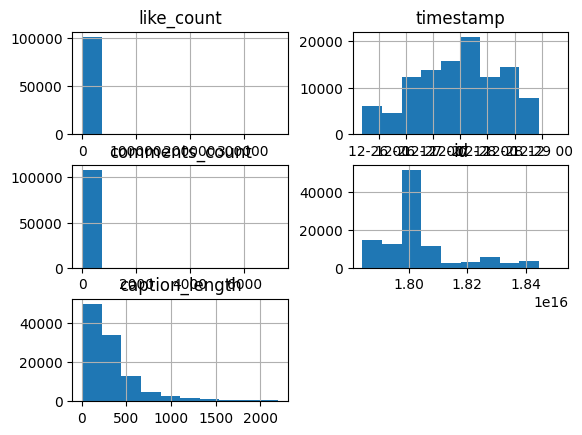

In [370]:
# always look at the data
df_posts.hist()
pass

In [371]:
df_posts["caption"].head()
for x in df_posts["caption"].head(10):
    print(x)

『 𝐋𝐄𝐓𝐓𝐈𝐍𝐆 𝐓𝐇𝐄 𝐄𝐍𝐄𝐌𝐘 𝐋𝐄𝐀𝐕𝐄 𝐈𝐒 𝐍𝐎 𝐖𝐀𝐘 𝐓𝐎 𝐄𝐍𝐃 𝐓𝐇𝐄 𝐖𝐀𝐑. 』- Admiral Yi

Witness his final battle in cinemas on 4 January!

𝙏𝙄𝘾𝙆𝙀𝙏𝙄𝙉𝙂 𝙇𝙄𝙉𝙆 🎟 http://www.magnumfilmsglobal.com/-noryang-deadly-sea

🌊 𝐍𝐎𝐑𝐘𝐀𝐍𝐆: 𝐃𝐄𝐀𝐃𝐋𝐘 𝐒𝐄𝐀 | 노량: 죽음의 바다 | 露梁：死亡之海 🌊

🇦🇺 Australia | 澳洲 · 4 January | 01월04일극장대개봉
🇳🇿 New Zealand | 纽西蘭 · 4 January | 01월04일극장대개봉

#노량죽음의바다 #김한민감독님 #김윤석 #백윤식 #정재영 #허준호 #김성규 #이무생 #최덕문 #박명훈 #문정희 #NoryangDeadlySea #Noryang #TheAdmiral #Hansan #KimYoonSeok #BaekYoonShik #JungJaeYoung #HuhJoonHo #War #Battle #Korea #Australia #NewZealand #Koreanmovie #history #action #movie #2024
treniraću za veča čuda

#novibeograd #blokovi #film #basketball #basket #war #serbia #srbija #belgrade #beograd #designer #photo #photographer #blackandwhite #brutalism #art #architect #architecture #photooftheday #oldschool #instablackandwhite #urbanstreet #streets #streetphotographers #streetstyle #bwphotography
Dec 28, 2023 Gen. Patton quotation of the day: “Get a determined bunch of men and women, and they will win b

<Axes: >

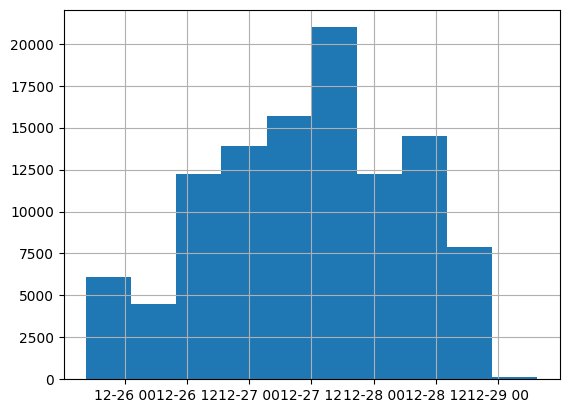

In [372]:
# focus more on timestamps
df_posts["timestamp"].hist()

Here it can be also seen that the we started on 26 to grab messages. TODO, write here more descirption

## 1.6 Final view of cleaned data set

In [373]:

print(f"number of toal documents in mongo db: {posts.count_documents({})}")
print(f"number of posts after cleaning database: {len(df_posts)}")
print(f"number of messages cleaned {posts.count_documents({}) - len(df_posts)}")

number of toal documents in mongo db: 204551
number of posts after cleaning database: 108134
number of messages cleaned 96417


# 2. Data Analysis

In this part I will do the following tasks:

1. Plot the hashtags occurence in the data in general
    - For my problem the question which hashtags occure mostly is imortant
2. Plot for specific hashtags
    - Considering the war hashtag how important is the palestine 
    - What are the opinions for that come with the palestine hashtag
    - What are opionions which ome with the Isreal hashtag
3. Is there any bias with the language?
    - is 
4. is there any bias with the time?
5. Is there any bias with the media type?
6. Senitment analysis

In [377]:
import re
# Todo: make lowercase and delete duplicates

# define a function to find all hashtags out of a text
def hashtags_inlcuded_In_text(text):
    hashtags = re.findall(r'#\w+', text.lower())

    #remove duplicates, dictionaries can not have duplicate keys
    hashtags = list(dict.fromkeys(hashtags))

    return hashtags

# for example
hashtags_inlcuded_In_text("asdfasdf #gaza#war asdfasdfasdf #thisIsAnExample#big_data_analytics_is_fun #GAza#WaR")

['#gaza', '#war', '#thisisanexample', '#big_data_analytics_is_fun']

In [407]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_hashtag_occurence(posts_dataframe):
    #create empty dictionary
    hashtag_amount = {}

    for hashtags_in_one_row in posts_dataframe["hashtags"]:
        for hashtag in hashtags_in_one_row:
            # check if hashtag is found first time
            if hashtag not in hashtag_amount:
                hashtag_amount[hashtag] = 0
            hashtag_amount[hashtag] = hashtag_amount[hashtag] + 1
        
    sorted_items = sorted(hashtag_amount.items(), key=lambda x: x[1], reverse=True)

    top_items = sorted_items[:20]
    # Extract items and their counts for plotting
    items, counts = zip(*top_items)

    # Plotting the bar chart
    plt.bar(items, counts, color='blue')
    plt.xlabel('Unique Items')
    plt.ylabel('Count')
    plt.title('Count of Unique Items')
    plt.xticks(rotation=45, ha='right')
    plt.show()
   



In [384]:
# add new column with unique hashtags occuring in one line
df_posts.loc[:, "hashtags"] = df_posts.apply(lambda x: hashtags_inlcuded_In_text(x["caption"]), axis=1)

In [397]:
for x in df_posts["caption"].head(3):
    print(x)

『 𝐋𝐄𝐓𝐓𝐈𝐍𝐆 𝐓𝐇𝐄 𝐄𝐍𝐄𝐌𝐘 𝐋𝐄𝐀𝐕𝐄 𝐈𝐒 𝐍𝐎 𝐖𝐀𝐘 𝐓𝐎 𝐄𝐍𝐃 𝐓𝐇𝐄 𝐖𝐀𝐑. 』- Admiral Yi

Witness his final battle in cinemas on 4 January!

𝙏𝙄𝘾𝙆𝙀𝙏𝙄𝙉𝙂 𝙇𝙄𝙉𝙆 🎟 http://www.magnumfilmsglobal.com/-noryang-deadly-sea

🌊 𝐍𝐎𝐑𝐘𝐀𝐍𝐆: 𝐃𝐄𝐀𝐃𝐋𝐘 𝐒𝐄𝐀 | 노량: 죽음의 바다 | 露梁：死亡之海 🌊

🇦🇺 Australia | 澳洲 · 4 January | 01월04일극장대개봉
🇳🇿 New Zealand | 纽西蘭 · 4 January | 01월04일극장대개봉

#노량죽음의바다 #김한민감독님 #김윤석 #백윤식 #정재영 #허준호 #김성규 #이무생 #최덕문 #박명훈 #문정희 #NoryangDeadlySea #Noryang #TheAdmiral #Hansan #KimYoonSeok #BaekYoonShik #JungJaeYoung #HuhJoonHo #War #Battle #Korea #Australia #NewZealand #Koreanmovie #history #action #movie #2024
treniraću za veča čuda

#novibeograd #blokovi #film #basketball #basket #war #serbia #srbija #belgrade #beograd #designer #photo #photographer #blackandwhite #brutalism #art #architect #architecture #photooftheday #oldschool #instablackandwhite #urbanstreet #streets #streetphotographers #streetstyle #bwphotography
Dec 28, 2023 Gen. Patton quotation of the day: “Get a determined bunch of men and women, and they will win b

In [396]:
# it functions and also we can look after specific hashtags easily
for x in df_posts["hashtags"].head(3):
    print(x)
    print("#war" in x)
    print("#film" in x)

['#노량죽음의바다', '#김한민감독님', '#김윤석', '#백윤식', '#정재영', '#허준호', '#김성규', '#이무생', '#최덕문', '#박명훈', '#문정희', '#noryangdeadlysea', '#noryang', '#theadmiral', '#hansan', '#kimyoonseok', '#baekyoonshik', '#jungjaeyoung', '#huhjoonho', '#war', '#battle', '#korea', '#australia', '#newzealand', '#koreanmovie', '#history', '#action', '#movie', '#2024']
True
False
['#novibeograd', '#blokovi', '#film', '#basketball', '#basket', '#war', '#serbia', '#srbija', '#belgrade', '#beograd', '#designer', '#photo', '#photographer', '#blackandwhite', '#brutalism', '#art', '#architect', '#architecture', '#photooftheday', '#oldschool', '#instablackandwhite', '#urbanstreet', '#streets', '#streetphotographers', '#streetstyle', '#bwphotography']
True
True
['#ww2', '#war', '#leadershipdevelopment', '#leadership', '#sullyerna']
True
False


In [398]:
df_posts.isnull().sum()

_id                   0
caption               0
like_count         6454
permalink             0
timestamp             0
media_type            0
comments_count        0
media_url         22582
id                    0
caption_length        0
hashtags              0
dtype: int64

In [399]:
# this lasts too long
overall = []
for hashtags_in_one_row in df_posts["hashtags"]:
    overall = overall + hashtags_in_one_row

KeyboardInterrupt: 

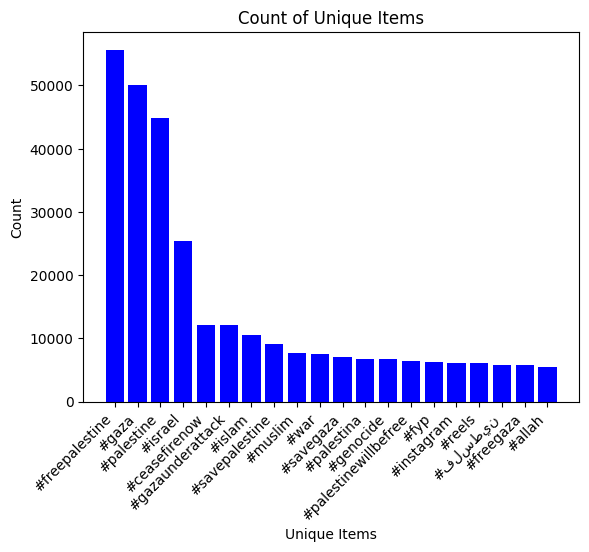

In [408]:


plot_hashtag_occurence(df_posts)



On the first place is the Freepaslistine hashtag, on the second the gaza hashtag and fourth the the isreal hashtag. We see not any of the both hashtags'BringThemHomeNow' or 'standwithisrael'. iT is clearly seeable that the favor is more for palestine and not for isreal. But let's inspect that futher.

In [ ]:
# let's look how important the palestine and isreal war is
messages_that_contain_war_hashtag = df_posts(lambda x: "#war" in  x["hashtags"])


In [381]:
unique_hashtags_in_one_row.head()
overall_hashtags = []


204550    [#노량죽음의바다, #김한민감독님, #김윤석, #백윤식, #정재영, #허준호, #김...
204549    [#novibeograd, #blokovi, #film, #basketball, #...
204548    [#ww2, #war, #leadershipdevelopment, #leadersh...
204547    [#aaryavartfilms, #arjun, #krishna, #kurukshet...
204546    [#kamalaharris, #2024election, #joe, #biden, #...
Name: caption, dtype: object

In [382]:
# are objects, which is good, because lists are objects
unique_hashtags_in_one_row.dtypes

dtype('O')

In [ ]:
# define a function for filtering out after one hashtag
df_captions = df_posts["caption"]
filtered_out = df_captions.apply(lambda x: "#war" in x["caption"].lower() ,axis=1)
filtered_out.head()

[('#palestine', 20),
 ('#gaza', 7),
 ('#islam', 6),
 ('#palestinewillbefree', 4),
 ('#israel', 4),
 ('#allah', 4),
 ('#freepalestine', 3),
 ('#muslimah', 3),
 ('#reels', 3),
 ('#reelsinstagram', 3),
 ('#explorepage', 3),
 ('#explore', 3),
 ('#followforfollowback', 3),
 ('#freedom', 3),
 ('#muslim', 3),
 ('#protest', 3),
 ('#quran', 3),
 ('#jannah', 3),
 ('#alaqsa', 3),
 ('#palestina', 2)]

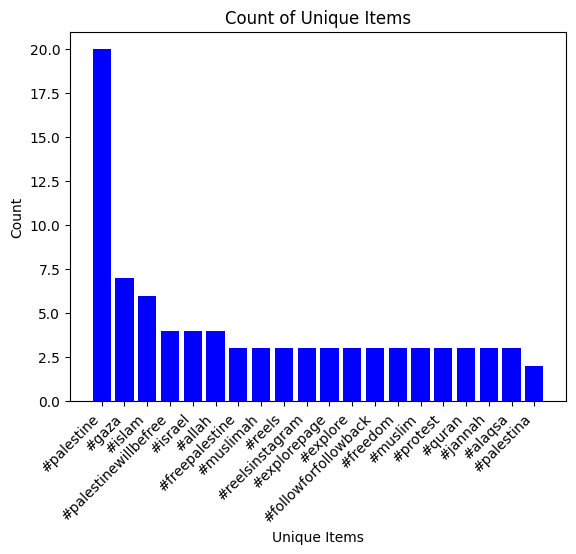